<h1>Linear regression: Training and Validation Data</h1>

In [1]:
# Import the libraries and set random seed

from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(1)

<h2 id="#Makeup_Data">Make Some Data</h2>

In [2]:
# Create Data Class

class Data(Dataset):
    
    # Constructor
    def __init__(self, train = True):
        if train == True:
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]
            if train == True:
                self.y[50:] = 20
        else:
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.y = -3 * self.x + 1
            self.len = self.x.shape[0]
            
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [3]:
#Create train_data object and val_data object

train_data = Data()
val_data = Data(train = False)

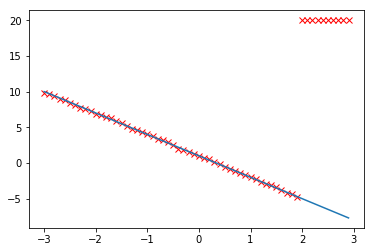

In [4]:
# Plot the training data points

plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr')
plt.plot(train_data.x.numpy(), train_data.f.numpy())
plt.show()

<h2 id="LR_Loader_Cost">Create a Linear Regression Class, Object, Data Loader, Criterion Function</h2>

In [6]:
# Create linear regression model class

from torch import nn

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Predition
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [7]:
# Create the model object

model = linear_regression(1, 1)

In [8]:
# Create optimizer, cost function and data loader object

optimizer = optim.SGD(model.parameters(), lr = 0.1)
criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size = 1)

<h2 id="Stop">Early Stopping and Saving the Mode</h2>